In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 1
1. Using different data for training and test data.
2. Include named entity

In [3]:
train_data = read_tsv('../raw dataset/all-tagged-280322-train.tsv')
test_data = read_tsv('../raw dataset/all-tagged-080422-test.tsv')


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.84      0.97      0.90     11123
          JV       0.89      0.82      0.86      4906
          EN       0.91      0.75      0.82      1746
          NE       0.85      0.32      0.47       675
           O       0.99      0.95      0.97      4817
   MIX-ID-EN       0.85      0.60      0.71       578
   MIX-ID-JV       0.96      0.37      0.54       204
   MIX-JV-EN       0.98      0.36      0.53       258

    accuracy                           0.88     24307
   macro avg       0.91      0.64      0.72     24307
weighted avg       0.89      0.88      0.88     24307



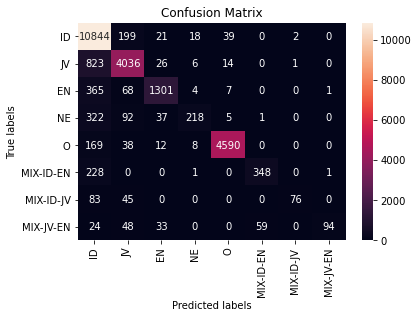


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     38006
          JV       0.93      0.93      0.93      8918
          EN       0.98      0.92      0.95      4877
          NE       0.97      0.84      0.90      2611
           O       1.00      0.98      0.99     14499
   MIX-ID-EN       0.99      0.97      0.98      2107
   MIX-ID-JV       0.99      0.93      0.96       626
   MIX-JV-EN       0.97      0.93      0.95       525

    accuracy                           0.97     72169
   macro avg       0.97      0.94      0.95     72169
weighted avg       0.97      0.97      0.97     72169



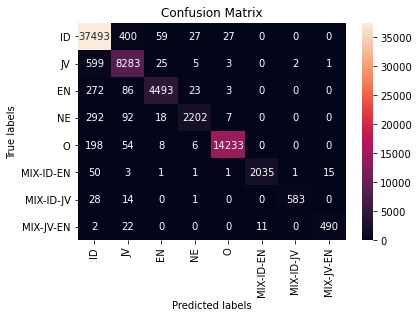


Top likely transitions:
O          -> O          4.81595
EN         -> O          3.98267
ID         -> O          3.97329
JV         -> O          3.84826
NE         -> O          3.71802
MIX-ID-EN  -> O          3.46678
MIX-JV-EN  -> O          3.04951
MIX-ID-JV  -> O          2.89825
NE         -> NE         1.98663
JV         -> JV         1.40808
EN         -> EN         1.38555
JV         -> MIX-JV-EN  0.94212
ID         -> NE         0.87029
EN         -> NE         0.84370
JV         -> NE         0.59025
ID         -> ID         0.58070
MIX-JV-EN  -> JV         0.45967
JV         -> MIX-ID-JV  0.45892
MIX-ID-JV  -> JV         0.45104
O          -> JV         0.34956

Top unlikely transitions:
MIX-ID-JV  -> ID         -0.60614
NE         -> EN         -0.69336
EN         -> MIX-JV-EN  -0.72078
MIX-JV-EN  -> MIX-ID-JV  -0.86566
MIX-ID-JV  -> EN         -0.87502
ID         -> JV         -0.94499
NE         -> MIX-ID-JV  -0.99214
JV         -> ID         -1.08450
NE         -> MI

In [4]:
langid.train_test_result_(train_data=train_data, test_data=test_data, n_label=8, model_name='mod_080422.pkl')

In [5]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)